<a href="https://colab.research.google.com/github/KHAGESH-46/data-science/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image

In [ ]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training for 5 epochs for speed in Colab
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3806 - loss: 1.6907 - val_accuracy: 0.5826 - val_loss: 1.1817
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5966 - loss: 1.1552 - val_accuracy: 0.6225 - val_loss: 1.0723
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6491 - loss: 1.0063 - val_accuracy: 0.6495 - val_loss: 0.9960
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6758 - loss: 0.9284 - val_accuracy: 0.6658 - val_loss: 0.9687
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7080 - loss: 0.8474 - val_accuracy: 0.6803 - val_loss: 0.9515


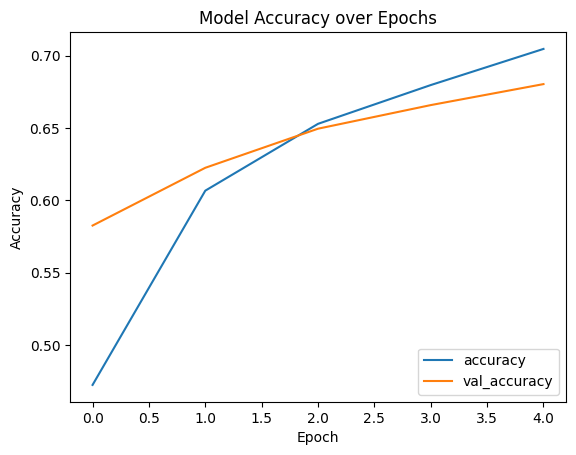

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Model Accuracy over Epochs")
plt.show()